# 課程目標
利用Keras 的 CIFAR10 dataset 來驗證損失函數對於模型精確度的影響 <br />
<br />
# 範例重點:
模型架構的層數<br />
<br />
使用何種LOSS function<br /><br />
# 導入必要的libray


In [1]:
import keras
from keras.datasets import cifar10
import numpy as np

np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(f' train data : images : {x_train.shape} , labels : {y_train.shape} ')
print(f' test data  : images : {x_test.shape}  , labels : {y_test.shape}  ') 

 train data : images : (50000, 32, 32, 3) , labels : (50000, 1) 
 test data  : images : (10000, 32, 32, 3)  , labels : (10000, 1)  


In [4]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

In [5]:
from keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)
y_test_onehot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [9]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (32, 32, 3), 
                activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2) ))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 256)         295168    
__________

# 載入之前訓練的模型

In [10]:
try:
    model.load_weights("SaceModel/cifarCnnModel.h5")
    print("loading model succeeded")
except:
    print("loading model failed")
    print("start train a new model")

loading model failed
start train a new model


# 訓練模型

In [7]:
#Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

NameError: name 'model' is not defined

In [14]:
train_history = model.fit( x_train_normalized, y_train_onehot, validation_split = 0.25,
                                     epochs = 12, batch_size = 128, verbose = 1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 119s 3ms/step - loss: 1.6605 - acc: 0.3822 - val_loss: 1.3447 - val_acc: 0.5060
Epoch 2/12
37500/37500 [==============================] - 116s 3ms/step - loss: 1.2319 - acc: 0.5502 - val_loss: 1.1149 - val_acc: 0.6057
Epoch 3/12
37500/37500 [==============================] - 113s 3ms/step - loss: 1.0241 - acc: 0.6358 - val_loss: 0.9731 - val_acc: 0.6554
Epoch 4/12
37500/37500 [==============================] - 110s 3ms/step - loss: 0.8854 - acc: 0.6865 - val_loss: 0.8926 - val_acc: 0.6874
Epoch 5/12
37500/37500 [==============================] - 108s 3ms/step - loss: 0.7582 - acc: 0.7327 - val_loss: 0.8432 - val_acc: 0.7125
Epoch 6/12
37500/37500 [==============================] - 110s 3ms/step - loss: 0.6631 - acc: 0.7663 - val_loss: 0.8246 - val_acc: 0.7195
Epoch 7/12
37500/37500 [==============================] - 110s 3ms/step - loss: 0.5782 - acc: 0.7955 - val_loss: 0.8757 - 

In [26]:
import matplotlib.pyplot as plt

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('train history')
    plt.ylabel(train)
    plt.xlabel('epochs')
    plt.legend(['train_acc', 'val_acc'], loc = 'upper left')
    plt.show()

In [27]:
show_train_history(train_history, 'acc', 'val_acc')

KeyError: 'acc'

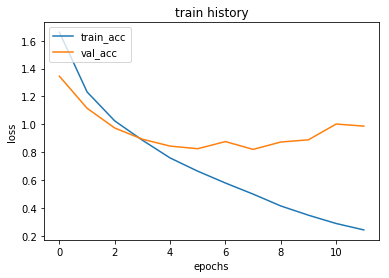

In [17]:
show_train_history(train_history, 'loss', 'val_loss')

# 作業目標:
1. 藉由固定的 dataset, 來驗證不同loss function <br />
2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響 <br />
# 作業重點:
請分別選用 "MSE", "binary _crossentropy"<br />
查看Train/test accurancy and loss rate<br />
導入必要的函數<br />

In [11]:
from keras.layers import BatchNormalization
from keras.models import Model
from keras.layers import Input

Input = Input(shape = (32,32,3), dtype = 'float32' )
x = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(Input)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2))(x)
x = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2))(x)
x = Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = MaxPooling2D(pool_size = (2,2))(x)
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)
Output = Dense(10, activation = 'softmax')(x)
Output2 = Dense(10,activation = 'sigmoid')(x)
model = Model(inputs = [Input] , outputs = [Output, Output, Output2])
model.compile(loss = ['categorical_crossentropy','MSE','binary_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 32, 32, 64)   1792        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 32, 32, 64)   256         conv2d_10[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_10 (MaxPooling2D) (None, 16, 16, 64)   0           batch_normalization_16[0][0]     
__________________________________________________________________________________________________
conv2d_11 

In [12]:

train_history = model.fit(x_train_normalized, [y_train_onehot,y_train_onehot,y_train_onehot]
                          , validation_split = 0.25,epochs =1, batch_size = 128, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Train on 37500 samples, validate on 12500 samples
Epoch 1/1
37500/37500 [==============================] - 262s 7ms/step - loss: 2.0425 - dense_14_loss: 0.0666 - dense_15_loss: 0.4831 - dense_14_acc: 0.4677 - dense_14_acc_1: 0.4677 - dense_15_acc: 0.7762 - val_loss: 1.7065 - val_dense_14_loss: 0.0628 - val_dense_15_loss: 0.2563 - val_dense_14_acc: 0.5113 - val_dense_14_acc_1: 0.5113 - val_dense_15_acc: 0.9110


In [24]:
train_history.history

{'val_loss': [1.9273361126708983,
  1.2593804764556884,
  1.334073669090271,
  1.1774132989120483,
  1.1979542778396606,
  1.2485748373794556],
 'val_dense_20_loss': [0.24487450253486634,
  0.16660694386959077,
  0.1739404784011841,
  0.15508914630413057,
  0.15897114695072173,
  0.16534438311576843],
 'val_dense_20_acc': [0.43672000005722045,
  0.6299999999427796,
  0.6183999999427795,
  0.665199999961853,
  0.6475200001525879,
  0.6502400001525879],
 'val_dense_20_acc_1': [0.43672000005722045,
  0.6299999999427796,
  0.6183999999427795,
  0.665199999961853,
  0.6475200001525879,
  0.6502400001525879],
 'val_dense_20_acc_2': [0.90558395986557,
  0.9337759716224671,
  0.9331679768562317,
  0.9397279911804199,
  0.9371999884605408,
  0.9368799939155579],
 'loss': [1.7506346235656738,
  1.2702938290659587,
  1.0823318678792317,
  0.9742753837712606,
  0.8877856535085042,
  0.8234560880851746],
 'dense_20_loss': [0.22349342691898347,
  0.16809666134993234,
  0.14519189264615376,
  0.13164

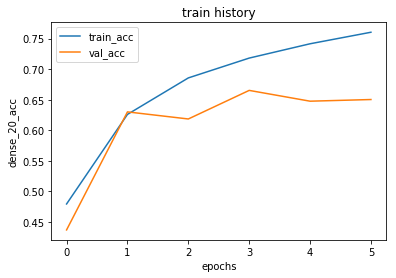

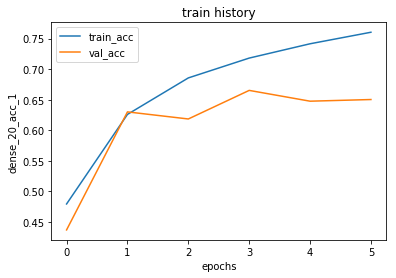

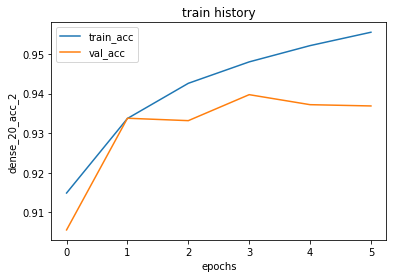

In [31]:
show_train_history(train_history,'dense_20_acc','val_dense_20_acc')
show_train_history(train_history,'dense_20_acc_1','val_dense_20_acc_1')
show_train_history(train_history,'dense_20_acc_2','val_dense_20_acc_2')